# Introducing a simple linear regression model

Vertical lines from the
regression line to the sample points are the so-called offsets or residuals—the errors
of our prediction.

# Exploring the Housing Dataset

In [11]:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                header = None, sep = '\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
             'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Visualizing the important characteristics of a dataset

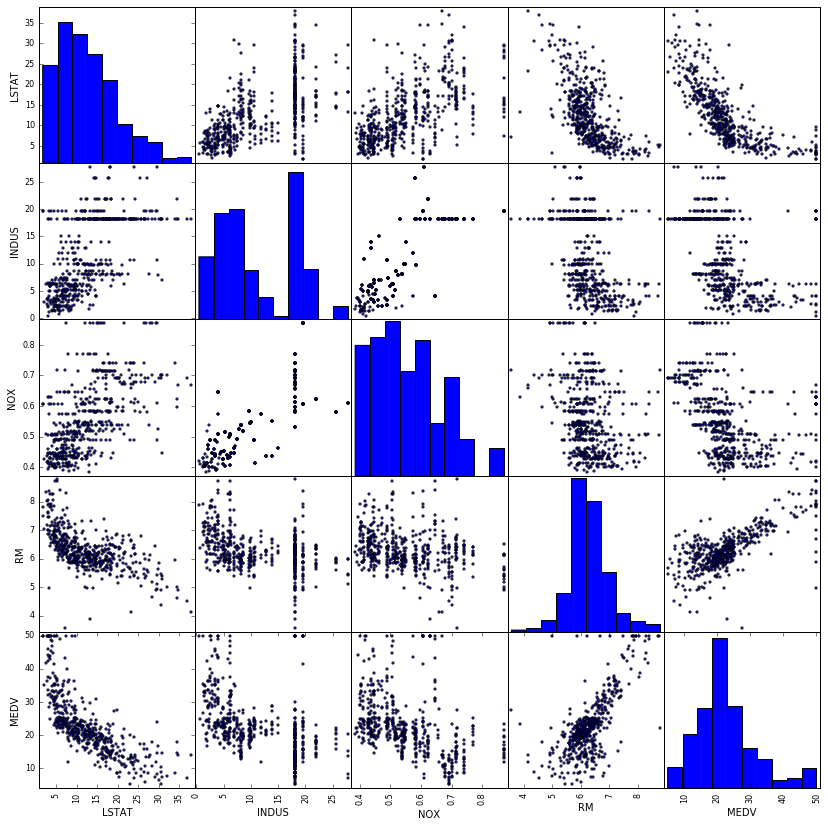

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatter_matrix(df[cols], alpha = 0.8, figsize = (14, 14), grid = True, diagonal = 'hist')
plt.show()

Note that in contrast to common belief, training a linear regression model
does not require that the explanatory or target variables are normally
distributed

/Users/Jaan/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


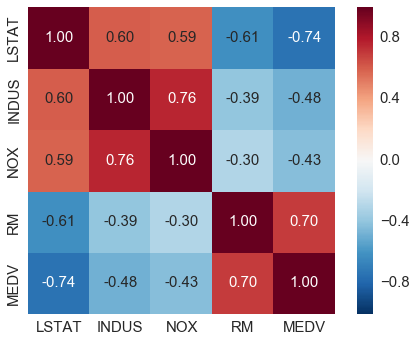

In [13]:
import numpy as np
import seaborn as sns
corr_mat = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
heat_map = sns.heatmap(corr_mat, cbar = True, 
                       annot = True, #include annotations
                       square = True, #represent each block as square
                       fmt ='.2f', #correlation values should be limited to 2 decimal places
                       annot_kws={'size': 15}, #anotation font size is 15
                      yticklabels = cols, #ytick labels will be column names
                      xticklabels = cols) #xtick labels will be column names
plt.show()

# Implementing an ordinary least squares linear regression model

### Solving regression for regression parameters with gradient descent

In [14]:
class LinearRegressionSGD(object):
    """
    Parameters
    -------------
    eta: float
        learning rate (between 0.0 and 1.0)
    n_iter: int
        Number of passes on training set

    Attributes
    ------------
    w_ : 1d-array
        Weuights after fitting 
    errors_: list
        Number of misclassifications at every pass
    """
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data 

        Parameters
        -----------
        X: array of shape = [n_samples, n_predictors]
            Training vectors
        y: array of shape = [n_samples]
            Target variable(s)

        Returns
        ---------
        self: object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """return predicted value for given input"""
        return self.net_input(X)    

/Users/Jaan/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jaan/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


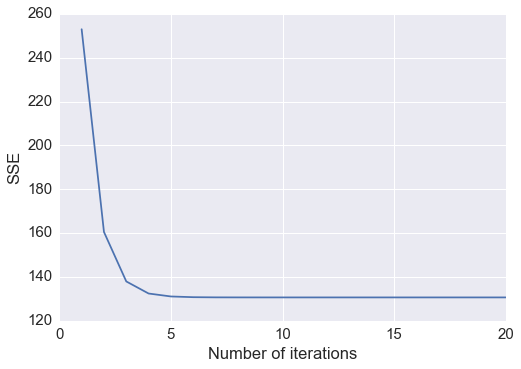

In [15]:
#test the linear regressor built
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionSGD()
lr.fit(X_std, y_std)

#plot output
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Number of iterations')
plt.show()

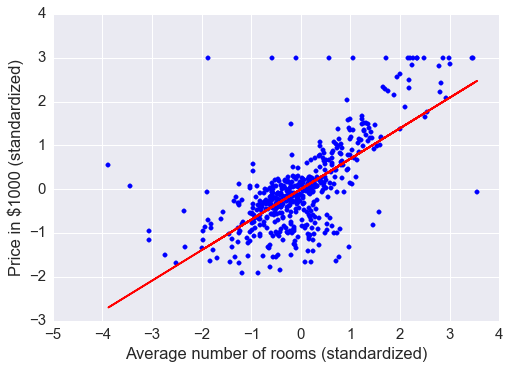

In [16]:
#visualize how well linear regression fits training data
def lin_regplot(X, y, model):
    plt.scatter(X, y, color = 'blue')
    plt.plot(X, model.predict(X), color = 'red')
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms (standardized)')
plt.ylabel('Price in $1000 (standardized)')
plt.show()

In [17]:
#predict the non-standardized value of price
num_rooms_std = sc_x.transform([5.0])
price_std = lr.predict(num_rooms_std)
print ('Price in $1000 : %.3f' %sc_y.inverse_transform(price_std))

Price in $1000 : 10.840


/Users/Jaan/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


On a side note, it is also worth mentioning that we technically don't have to update
the weights of the intercept if we are working with standardized variables since the
y axis intercept is always 0 in those cases.

In [18]:
print ('Slope: %.3f' %lr.w_[1])
print()
print('Intercept: %.3f' %lr.w_[0])

Slope: 0.695

Intercept: -0.000


### Estimating the coefficient of a regression model via scikit-learn

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_std, y_std)
print ('Slope: %.3f' %lin_reg.coef_[0])
print ()
print ('Intercept : %.3f' %lin_reg.intercept_)

Slope: 0.695

Intercept : -0.000


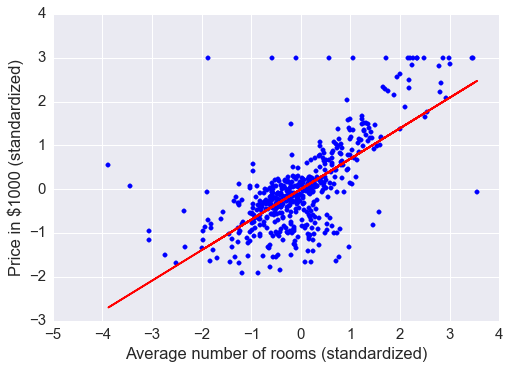

In [20]:
lin_regplot(X_std, y_std, lin_reg)
plt.xlabel('Average number of rooms (standardized)')
plt.ylabel('Price in $1000 (standardized)')
plt.show()

# Fitting a robust regression model using RANSAC

RANdom SAmple Consensus (RANSAC) algorithm fits a regression model to a subset of the data, the so-called inliers.

In [21]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), max_trials = 100, #max number of iterations
                         min_samples = 50, #minimum number of randomly chose sample points in each iteration
                        residual_metric = lambda x: np.sum(np.abs(x), axis = 1), #abs vertical distance 
                                                                     #between fitted line and actual value
                        residual_threshold = 5.0, #include datapoints only if residual_metric < 5.0
                         random_state = 0)
ransac.fit(X, y)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x10d200158>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

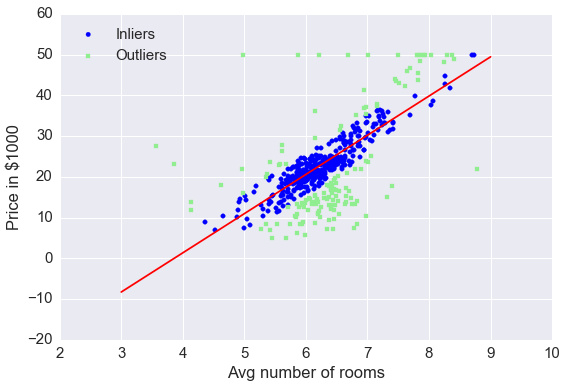

In [22]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], color = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color = 'lightgreen', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'red')
plt.xlabel('Avg number of rooms')
plt.ylabel('Price in $1000')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [23]:
print ('Slope : %.3f' %ransac.estimator_.coef_[0])
print ()
print ('Intercept : %.3f' %ransac.estimator_.intercept_)

Slope : 9.621

Intercept : -37.137


# Evaluating the performance of linear regression models

In the case of a perfect prediction, the residuals would be exactly zero, which we will
probably never encounter in realistic and practical applications. However, for a good
regression model, we would expect that the errors are randomly distributed and
the residuals should be randomly scattered around the centerline. If we see patterns
in a residual plot, it means that our model is unable to capture some explanatory
information, which is leaked into the residuals as we can slightly see in our preceding
residual plot. Furthermore, we can also use residual plots to detect outliers, which are
represented by the points with a large deviation from the centerline.

In [24]:
#split data into training and testing samples and fit and predict model
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

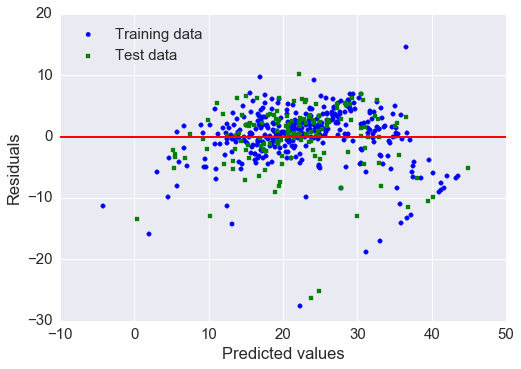

In [25]:
#plot residuals output
plt.scatter(y_train_pred, y_train_pred - y_train, color = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, color = 'green', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
print ('MSE train: %.3f, MSE test: %.3f' %(mean_squared_error(y_train, y_train_pred), 
                                          mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, MSE test: 27.196


For the training dataset, R2 is bounded between 0 and 1, but it can become
negative for the test set. If R2 =1, the model fits the data perfectly with a
corresponding MSE = 0 .

In [27]:
from sklearn.metrics import r2_score
print ('R-squared train: %.3f, R-squared test: %.3f' %(r2_score(y_train, y_train_pred), 
                                                      r2_score(y_test, y_test_pred)))

R-squared train: 0.765, R-squared test: 0.673


# Using regularized methods for regression

The most popular approaches to
regularized linear regression are the so-called Ridge Regression, Least Absolute
Shrinkage and Selection Operator (LASSO) and Elastic Net method.

Ridge regression is an L2 penalized model where we simply add the squared sum of
the weights to our least-squares cost function. By increasing the value of the hyperparameter  , we increase the regularization
strength and shrink the weights of our model. Please note that we don't regularize
the intercept term 0 w .

An alternative approach that can lead to sparse models is the LASSO. Depending
on the regularization strength, certain weights can become zero, which makes the
LASSO also useful as a supervised feature selection technique. 

However, a limitation of the LASSO is that it selects at most n variables if m > n . A
compromise between Ridge regression and the LASSO is the Elastic Net, which has a
L1 penalty to generate sparsity and a L2 penalty to overcome some of the limitations
of the LASSO, such as the number of selected variables

In [28]:
#ridge regularization
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0)

#lasso regularization
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)

#elastic net regularization
from sklearn.linear_model import ElasticNet
elstc_net = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

# Turning a linear regression model into a curve – polynomial regression

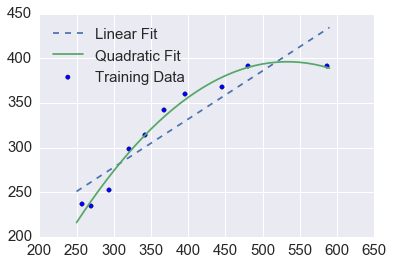


Training MSE Linear: 564.868, Quadratic: 60.273

Training R-squared Linear: 0.833, Quadratic: 0.982


In [29]:
#add second degree polynomial term
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = np.array ([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.0, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X)

#fit linear regression model 
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

#fit multiple regression model on polynomial features
pr.fit(X_quad, y)
X_fit_quad = quad.fit_transform(X_fit)
y_quad_fit = pr.predict(X_fit_quad)

#plot results
plt.scatter(X, y, label = 'Training Data')
plt.plot(X_fit, y_lin_fit, label = 'Linear Fit', linestyle = '--')
plt.plot(X_fit, y_quad_fit, label = 'Quadratic Fit')
plt.legend(loc = 'upper left')
plt.show()


#Compute and print mean squared error and r-squared for both models
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print()
print ('Training MSE Linear: %.3f, Quadratic: %.3f' %(mean_squared_error(y, y_lin_pred), 
                                                     mean_squared_error(y, y_quad_pred)))
print()
print('Training R-squared Linear: %.3f, Quadratic: %.3f'%(r2_score(y, y_lin_pred), 
                                                         r2_score(y, y_quad_pred)))

### Modeling nonlinear relationships in the Housing Dataset

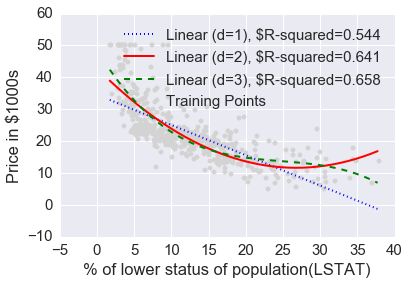

In [40]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

#create polynomial features
quad = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quad.fit_transform(X)
X_cubic = cubic.fit_transform(X)

#linear fit model
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))


#quadractic fit
regr = regr.fit(X_quad, y)
X_quad_fit = quad.fit_transform(X_fit)
y_quad_fit = regr.predict(X_quad_fit)
quad_r2 = r2_score(y, regr.predict(X_quad))

#cubic fit
regr = regr.fit(X_cubic, y)
X_cubic_fit = cubic.fit_transform(X_fit)
y_cubic_fit = regr.predict(X_cubic_fit)
cubic_r2 = r2_score(y, regr.predict(X_cubic))


#plot results
plt.scatter(X, y, label = 'Training Points', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label = 'Linear (d=1), $R-squared=%.3f' %linear_r2, color = 'blue', 
         lw = 2, ls = ':')
plt.plot(X_fit, y_quad_fit, label = 'Linear (d=2), $R-squared=%.3f' %quad_r2, color = 'red', 
         lw = 2, ls = '-')
plt.plot(X_fit, y_cubic_fit, label = 'Linear (d=3), $R-squared=%.3f' %cubic_r2, color = 'green', 
         lw = 2, ls = '--')
plt.xlabel('% of lower status of population(LSTAT)')
plt.ylabel('Price in $1000s')
plt.legend(loc = 'upper right')
plt.show()

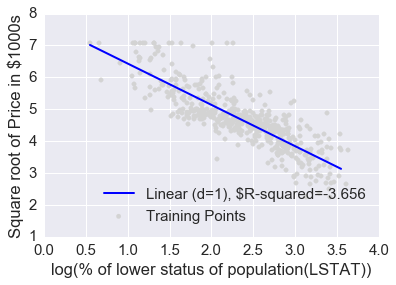

In [41]:
#transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

#fit features
X_fit = np.arange(X_log.min(), X_log.max(), 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X_log))


#plot results
plt.scatter(X_log, y_sqrt, label = 'Training Points', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label = 'Linear (d=1), $R-squared=%.3f' %linear_r2, color = 'blue', 
         lw = 2)
plt.xlabel('log(% of lower status of population(LSTAT))')
plt.ylabel('Square root of Price in $1000s')
plt.legend(loc = 'lower right')
plt.show()

### Dealing with nonlinear relationships using random forests

#### Decision tree regression

An advantage of the decision tree algorithm is that it does not require any
transformation of the features if we are dealing with nonlinear data. we grow
a decision tree by iteratively splitting its nodes until the leaves are pure or a stopping
criterion is satisfied. When we used decision trees for classification, we defined
entropy as a measure of impurity to determine which feature split maximizes the
Information Gain (IG). To use a decision tree for regression,
we will replace entropy as the impurity measure of a node t by the MSE.In the context of decision tree regression, the MSE is often also referred to as
within-node variance, which is why the splitting criterion is also better known
as variance reduction.

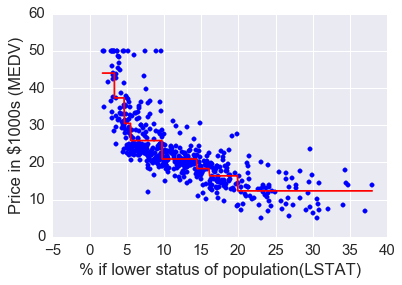

In [46]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% if lower status of population(LSTAT)')
plt.ylabel('Price in $1000s (MEDV)')
plt.show()

#### Random forest regression

A random forest usually has a better generalization
performance than an individual decision tree due to randomness that helps to
decrease the model variance. Other advantages of random forests are that they are
less sensitive to outliers in the dataset and don't require much parameter tuning.
The only parameter in random forests that we typically need to experiment with
is the number of trees in the ensemble. We use the MSE criterion to grow the individual decision
trees, and the predicted target variable is calculated as the average prediction over all
decision trees.

In [54]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', random_state = 1, 
                              n_jobs = -1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print ('MSE train: %.3f, MSE test %.3f' %(mean_squared_error(y_train, y_train_pred), 
                                          mean_squared_error(y_test, y_test_pred)))
print()
print('R-squared train: %.3f, R-squared test: %.3f' %(r2_score(y_train, y_train_pred), 
                                                     r2_score(y_test, y_test_pred)))

MSE train: 1.642, MSE test 11.052

R-squared train: 0.979, R-squared test: 0.878


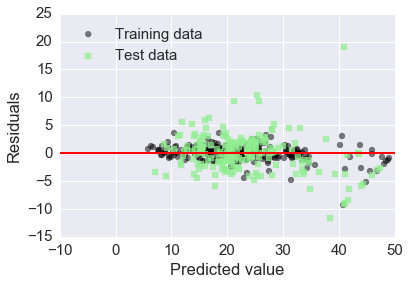

In [55]:
plt.scatter(y_train_pred, y_train_pred - y_train, color = 'black', marker = 'o', s = 35, 
           alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, color = 'lightgreen', marker = 's', s = 35,
           alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()